# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import json

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [3]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")


Number of cities in the list: 589


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [4]:

# Set the API base URL
base_url = "https://api.openweathermap.org/data/2.5/weather?q="
api_key = "&appid=" + weather_api_key

# Define an empty list to fetch the weather data for each city
city_data = []
# Print to logger
print("Beginning Data Retrieval")
print("-----------------------------")
# Create counters
record_count = 1
set_count = 1
# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0
    # Create endpoint URL with each city
    city_url = f"{base_url}{city}{api_key}"
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))
    # Add 1 to the record count
    record_count += 1
    # Run an API request for each of the cities
    try: #if you do not use try block then it will stop at the first "City not found and not run the code"
        city_weather = requests.get(city_url).json()  # Make the API request and store the response

        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        city_data.append({
            "City": city,
            "Lat": city_lat,
            "Lng": city_lng,
            "Max Temp": city_max_temp,
            "Humidity": city_humidity,
            "Cloudiness": city_clouds,
            "Wind Speed": city_wind,
            "Country": city_country,
            "Date": city_date
        })
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete")
print("-----------------------------")

Beginning Data Retrieval
-----------------------------
Processing Record 1 of Set 1 | edinburgh of the seven seas
Processing Record 2 of Set 1 | agropoli
Processing Record 3 of Set 1 | port mathurin
Processing Record 4 of Set 1 | kuta
Processing Record 5 of Set 1 | al bawiti
Processing Record 6 of Set 1 | la passe
Processing Record 7 of Set 1 | bilibino
Processing Record 8 of Set 1 | aykhal
Processing Record 9 of Set 1 | albany
Processing Record 10 of Set 1 | colonia
Processing Record 11 of Set 1 | blackmans bay
Processing Record 12 of Set 1 | tazovsky
Processing Record 13 of Set 1 | olonkinbyen
Processing Record 14 of Set 1 | harstad
Processing Record 15 of Set 1 | papatowai
Processing Record 16 of Set 1 | bhimunipatnam
Processing Record 17 of Set 1 | ushuaia
Processing Record 18 of Set 1 | bethel
Processing Record 19 of Set 1 | zonguldak
Processing Record 20 of Set 1 | vennesla
Processing Record 21 of Set 1 | waitangi
Processing Record 22 of Set 1 | khandyga
Processing Record 23 of S

In [5]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          554
Lat           554
Lng           554
Max Temp      554
Humidity      554
Cloudiness    554
Wind Speed    554
Country       554
Date          554
dtype: int64

In [6]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,edinburgh of the seven seas,-37.0676,-12.3116,287.31,82,6,8.59,SH,1699820697
1,agropoli,40.3469,14.9966,287.09,85,21,3.12,IT,1699820698
2,port mathurin,-19.6833,63.4167,298.04,81,0,2.54,MU,1699820698
3,kuta,-8.7233,115.1723,299.12,88,75,2.24,ID,1699820698
4,al bawiti,28.3492,28.8659,296.03,55,0,3.44,EG,1699820699


In [7]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")
city_data_df.head()


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,edinburgh of the seven seas,-37.0676,-12.3116,287.31,82,6,8.59,SH,1699820697
1,agropoli,40.3469,14.9966,287.09,85,21,3.12,IT,1699820698
2,port mathurin,-19.6833,63.4167,298.04,81,0,2.54,MU,1699820698
3,kuta,-8.7233,115.1723,299.12,88,75,2.24,ID,1699820698
4,al bawiti,28.3492,28.8659,296.03,55,0,3.44,EG,1699820699


In [8]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,edinburgh of the seven seas,-37.0676,-12.3116,287.31,82,6,8.59,SH,1699820697
1,agropoli,40.3469,14.9966,287.09,85,21,3.12,IT,1699820698
2,port mathurin,-19.6833,63.4167,298.04,81,0,2.54,MU,1699820698
3,kuta,-8.7233,115.1723,299.12,88,75,2.24,ID,1699820698
4,al bawiti,28.3492,28.8659,296.03,55,0,3.44,EG,1699820699


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

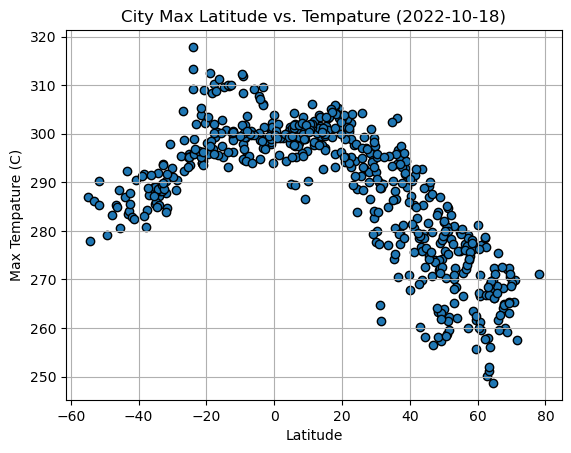

In [9]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"],city_data_df["Max Temp"], edgecolors="black")

# Incorporate the other graph properties
plt.title("City Max Latitude vs. Tempature (2022-10-18)")
plt.xlabel("Latitude")
plt.ylabel("Max Tempature (C)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

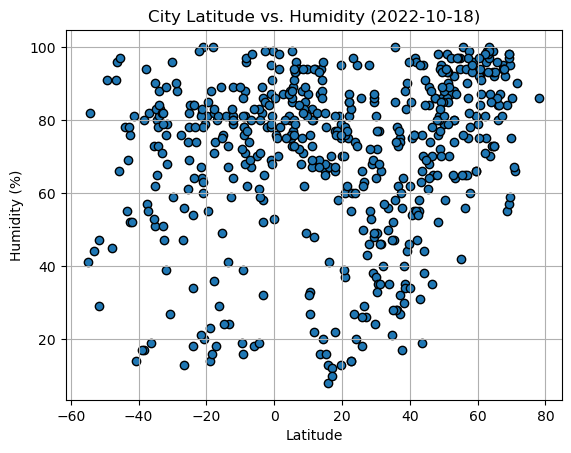

In [10]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"],city_data_df["Humidity"], edgecolors="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (2022-10-18)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)

# Incorporate the other graph properties
# YOUR CODE HERE

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

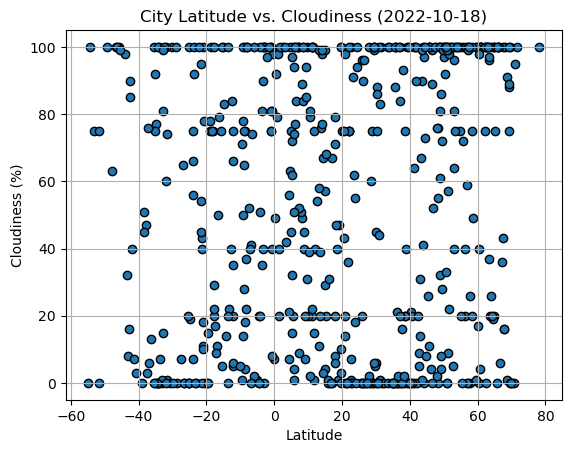

In [11]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"],city_data_df["Cloudiness"], edgecolors="black")
# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (2022-10-18)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)

# Incorporate the other graph properties
# YOUR CODE HERE

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

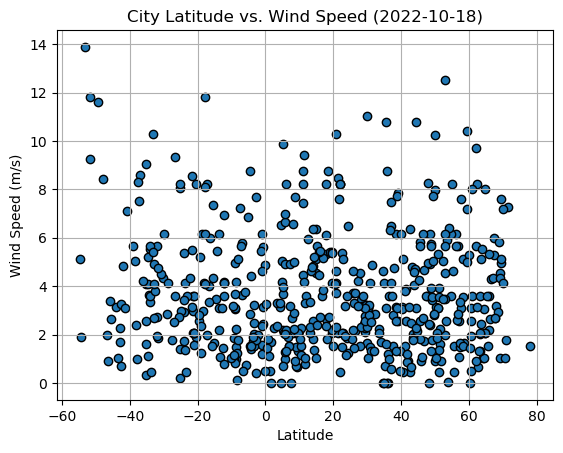

In [14]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"],city_data_df["Wind Speed"], edgecolors="black")
plt.title("City Latitude vs. Wind Speed (2022-10-18)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid(True)

# Incorporate the other graph properties
# YOUR CODE HERE

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [15]:
# Define a function to create Linear Regression plots
def linear_function(x):
    return slpe * x + intercept


In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df['Lat'] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,ilulissat,69.2167,-51.1000,267.16,63,75,7.72,GL,1699604293
5,tevriz,57.5090,72.4042,273.84,92,100,1.60,RU,1699604294
9,wanlaweyn,2.6185,44.8938,305.45,49,36,5.22,SO,1699604248
10,bethel,41.3712,-73.4140,281.08,85,0,0.00,US,1699604297
12,limbe,4.0242,9.2149,298.14,93,100,1.81,CM,1699604299


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df['Lat'] < 0]

# Display sample data
southern_hemi_df.head()


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,pimentel,-6.8367,-79.9342,292.31,88,0,4.63,PE,1699604291
1,forster,-32.1667,152.5167,294.47,84,4,6.41,AU,1699604292
3,puerto ayora,-0.7393,-90.3518,297.34,92,100,4.02,EC,1699604293
4,alofi,-19.0595,-169.9187,298.09,94,75,3.09,NU,1699604294
6,san juan de miraflores,-12.1629,-76.9635,292.13,84,99,2.26,PE,1699604295


###  Temperature vs. Latitude Linear Regression Plot

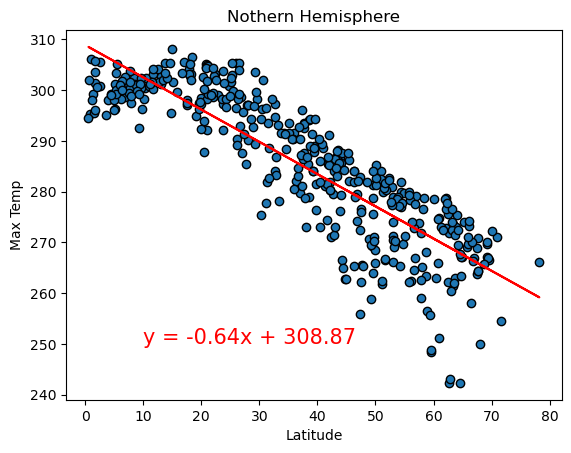

In [15]:
 #Linear regression on Northern Hemisphere
x_axis = northern_hemi_df['Lat']
y_axis = northern_hemi_df['Max Temp']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.show()

plt.scatter(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"], edgecolor="black")
plt.plot(northern_hemi_df["Lat"], regress_values, color="r")
plt.title("Nothern Hemisphere")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.annotate(line_eq,(10,250),fontsize=15,color="red")
plt.show()


plt.show()

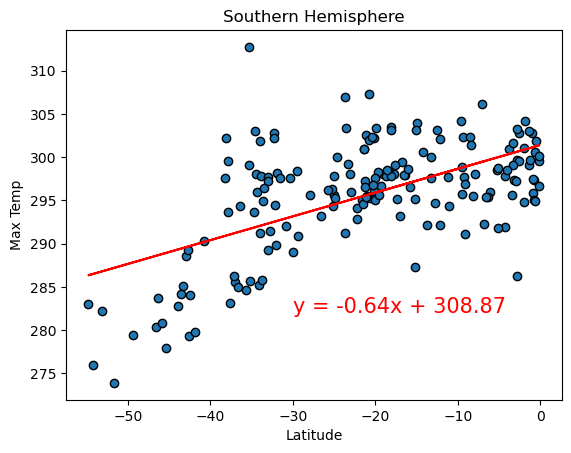

In [16]:
# Linear regression on Southern Hemisphere
x_axis = southern_hemi_df['Lat']
y_axis = southern_hemi_df['Max Temp']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept



plt.scatter(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"],  edgecolor="black")
plt.plot(southern_hemi_df["Lat"], regress_values, color="r")
plt.title("Southern Hemisphere")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.annotate(line_eq,(-30,282),fontsize=15,color="red")
plt.show()
plt.show()

plt.show()

**Discussion about the linear relationship:** In the regression it displays a minor postive interaction between temperature and latitude.
In the southern hemisphere, as the latitude increases the tempature rises with it 


### Humidity vs. Latitude Linear Regression Plot

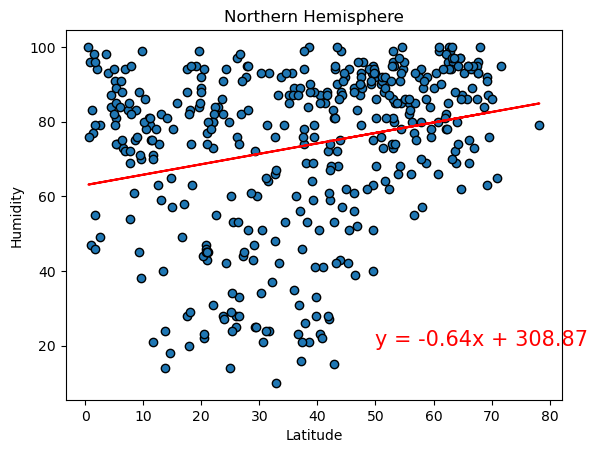

In [17]:
# Northern Hemisphere
# # Linear regression on Southern Hemisphere
x_axis = northern_hemi_df['Lat']
y_axis = northern_hemi_df['Humidity']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept



plt.scatter(northern_hemi_df["Lat"], northern_hemi_df["Humidity"],  edgecolor="black")
plt.plot(northern_hemi_df["Lat"], regress_values, color="r")
plt.title("Northern Hemisphere")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.annotate(line_eq,(50,20),fontsize=15,color="red")
plt.show()
plt.show()

plt.show()

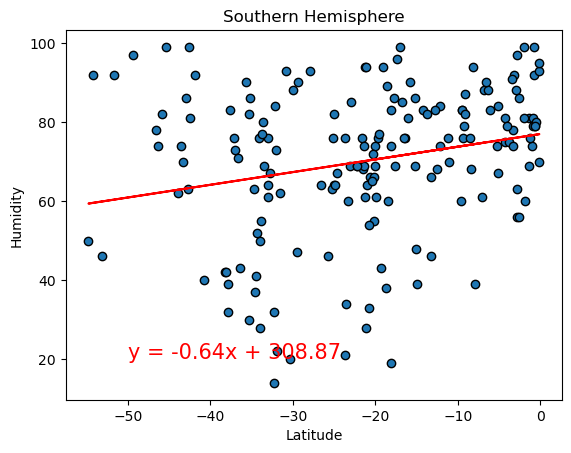

In [18]:
# Southern Hemisphere
x_axis = southern_hemi_df['Lat']
y_axis = southern_hemi_df['Humidity']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept



plt.scatter(southern_hemi_df["Lat"], southern_hemi_df["Humidity"],  edgecolor="black")
plt.plot(southern_hemi_df["Lat"], regress_values, color="r")
plt.title("Southern Hemisphere")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.annotate(line_eq,(-50,20),fontsize=15,color="red")
plt.show()
plt.show()

plt.show()

**Discussion about the linear relationship:** A very minute resemblance here.  Although this has a correlation of positivity, it is slight. 
The humidity only increases slightly as it moves closer to the equator.

### Cloudiness vs. Latitude Linear Regression Plot

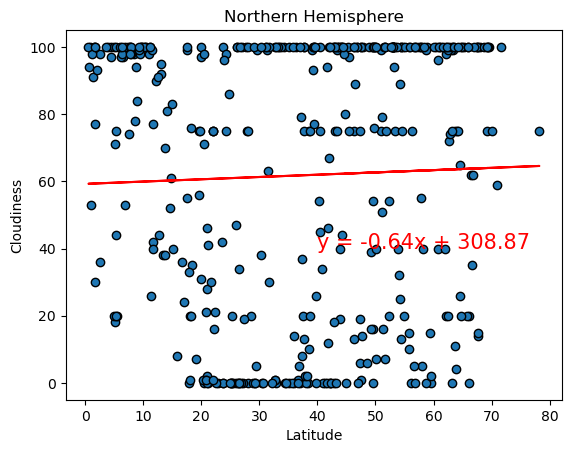

In [19]:
# Northern Hemisphere
x_axis = northern_hemi_df['Lat']
y_axis = northern_hemi_df['Cloudiness']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept



plt.scatter(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"],  edgecolor="black")
plt.plot(northern_hemi_df["Lat"], regress_values, color="r")
plt.title("Northern Hemisphere")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.annotate(line_eq,(40,40),fontsize=15,color="red")
plt.show()
plt.show()

plt.show()

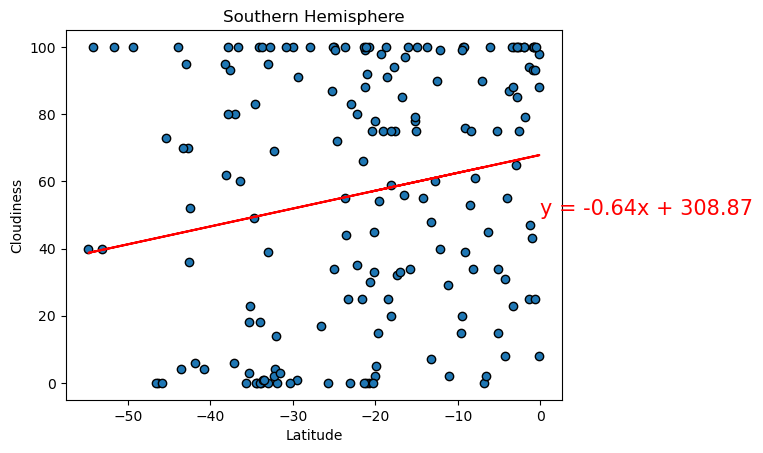

In [20]:
# Southern Hemisphere
x_axis = southern_hemi_df['Lat']
y_axis = southern_hemi_df['Cloudiness']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept



plt.scatter(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"],  edgecolor="black")
plt.plot(southern_hemi_df["Lat"], regress_values, color="r")
plt.title("Southern Hemisphere")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.annotate(line_eq,(-0,50),fontsize=15,color="red")
plt.show()
plt.show()

plt.show()

**Discussion about the linear relationship:** Does not seem to be a strong relationship between the cloudiness and latitude 

### Wind Speed vs. Latitude Linear Regression Plot

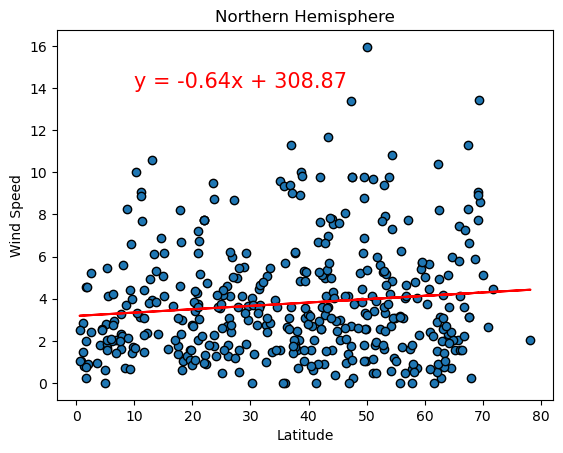

In [21]:
# Northern Hemisphere
x_axis = northern_hemi_df['Lat']
y_axis = northern_hemi_df['Wind Speed']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept



plt.scatter(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"],  edgecolor="black")
plt.plot(northern_hemi_df["Lat"], regress_values, color="r")
plt.title("Northern Hemisphere")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.annotate(line_eq,(10,14),fontsize=15,color="red")
plt.show()
plt.show()

plt.show()

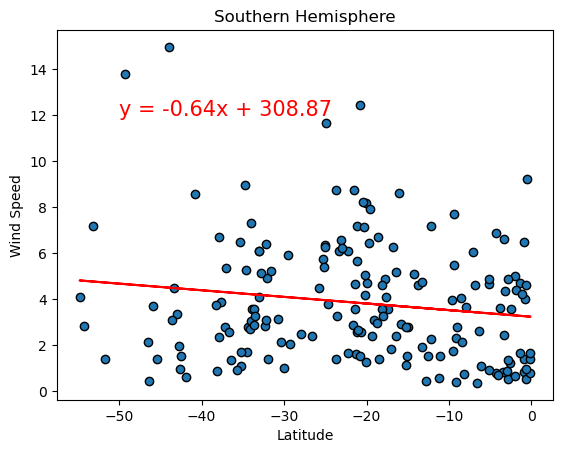

In [22]:
# Southern Hemisphere
x_axis = southern_hemi_df['Lat']
y_axis = southern_hemi_df['Wind Speed']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept



plt.scatter(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"],  edgecolor="black")
plt.plot(southern_hemi_df["Lat"], regress_values, color="r")
plt.title("Southern Hemisphere")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.annotate(line_eq,(-50,12),fontsize=15,color="red")
plt.show()
plt.show()

plt.show()

**Discussion about the linear relationship:** The coorelation between Latitude and Wind speed is almost non-existent.